# Análise de Consumo de Energia na Holanda (2009-2020)

Este notebook explora os dados de consumo de energia fornecidos por diferentes operadoras na Holanda, respondendo perguntas de inspiração com o uso de inteligência artificial.

## 1. Importação e Exploração Inicial dos Dados

Vamos importar todos os arquivos CSV da pasta `datasets` e realizar uma análise exploratória inicial.

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Baixando os datasets
arquivos = kagglehub.dataset_download("lucabasa/dutch-energy")

# Caminho para os datasets
DATASET_PATH = arquivos + '/Electricity'

# Listar todos os arquivos CSV da Liander
csv_files = sorted([f for f in os.listdir(DATASET_PATH) if f.startswith('liander_electricity') and f.endswith('.csv')])

# Carregar todos os arquivos em um único DataFrame, adicionando o ano
all_data = []
for file in csv_files:
    year = file[-8:-4]  # Extrai o ano do nome do arquivo
    df = pd.read_csv(os.path.join(DATASET_PATH, file))
    df['year'] = int(year)
    all_data.append(df)
df_all = pd.concat(all_data, ignore_index=True)

# Exibir as primeiras linhas e informações gerais
display(df_all.head())
display(df_all.info())
display(df_all.describe())

Using Colab cache for faster access to the 'dutch-energy' dataset.


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15.0,100.0,66.67,47.0,3x25,12958.0,46.67,0.0,2009
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,23.0,100.0,78.26,43.0,3x25,14761.0,39.13,0.0,2009
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,31.0,100.0,77.42,58.0,3x25,12139.0,16.13,0.0,2009
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21.0,100.0,66.67,52.0,3x25,5082.0,47.62,0.0,2009
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,15.0,100.0,60.00,93.0,3x25,3712.0,33.33,0.0,2009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655181 entries, 0 to 1655180
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   net_manager                   1655181 non-null  object 
 1   purchase_area                 768524 non-null   object 
 2   street                        1655181 non-null  object 
 3   zipcode_from                  1655181 non-null  object 
 4   zipcode_to                    1655181 non-null  object 
 5   city                          1655181 non-null  object 
 6   num_connections               1655181 non-null  float64
 7   delivery_perc                 1655181 non-null  float64
 8   perc_of_active_connections    1655181 non-null  float64
 9   type_conn_perc                1655181 non-null  float64
 10  type_of_connection            1655181 non-null  object 
 11  annual_consume                1655181 non-null  float64
 12  annual_consume_lowtarif_perc

None

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
count,1.655181e+06,1.655181e+06,1.655181e+06,1.655181e+06,1.655181e+06,1.655181e+06,1.655181e+06,1.655181e+06
mean,2.352824e+01,9.596689e+01,9.381499e+01,7.714807e+01,4.505444e+03,4.739266e+01,2.061035e+01,2.014594e+03
std,1.599816e+01,9.407772e+00,1.310782e+01,1.949309e+01,3.639126e+03,3.133779e+01,3.088790e+01,3.455366e+00
min,6.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.009000e+03
25%,1.600000e+01,9.600000e+01,9.286000e+01,6.100000e+01,2.646000e+03,2.000000e+01,0.000000e+00,2.012000e+03
50%,2.000000e+01,1.000000e+02,1.000000e+02,8.000000e+01,3.475000e+03,4.400000e+01,4.170000e+00,2.015000e+03
75%,2.600000e+01,1.000000e+02,1.000000e+02,9.600000e+01,4.788000e+03,7.500000e+01,2.778000e+01,2.018000e+03
max,1.088000e+03,1.000000e+02,1.000000e+02,1.000000e+02,6.168400e+04,1.000000e+02,1.000000e+02,2.020000e+03


## 2. Disseminação dos Medidores Inteligentes

Vamos analisar a evolução da porcentagem de conexões com medidores inteligentes (`smartmeter_perc`) ao longo dos anos.

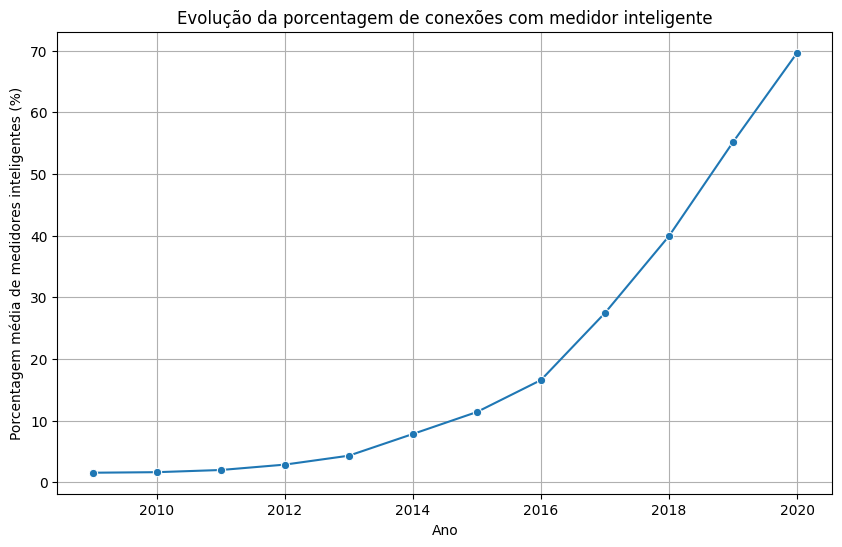

In [7]:
# Evolução da porcentagem de medidores inteligentes
smartmeter_year = df_all.groupby('year')['smartmeter_perc'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=smartmeter_year.index, y=smartmeter_year.values, marker='o')
plt.title('Evolução da porcentagem de conexões com medidor inteligente')
plt.xlabel('Ano')
plt.ylabel('Porcentagem média de medidores inteligentes (%)')
plt.grid(True)
plt.show()

## 3. Tendência de Energia Produzida em Casa (Painéis Solares)

Vamos investigar a evolução da energia produzida em casa ao longo dos anos. Para isso, analisaremos as colunas relacionadas à produção própria de energia, caso estejam presentes nos dados.

In [8]:
# Verificar colunas relacionadas à produção de energia
print('Colunas disponíveis:', df_all.columns.tolist())

# Se houver coluna relacionada à produção própria, analisar sua evolução
# Exemplo: 'annual_production' ou similar
if 'annual_production' in df_all.columns:
    prod_year = df_all.groupby('year')['annual_production'].sum()
    plt.figure(figsize=(10,6))
    sns.lineplot(x=prod_year.index, y=prod_year.values, marker='o')
    plt.title('Evolução da produção anual de energia (painéis solares)')
    plt.xlabel('Ano')
    plt.ylabel('Energia produzida (kWh)')
    plt.grid(True)
    plt.show()
else:
    print('Coluna de produção própria de energia não encontrada nos dados.')

Colunas disponíveis: ['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', 'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc', 'year']
Coluna de produção própria de energia não encontrada nos dados.


**Observação:** Não há coluna explícita de produção própria de energia (ex: painéis solares) nos dados disponíveis. Como alternativa, podemos analisar a evolução do consumo em tarifas diferenciadas (ex: baixa tarifa) ou proporções de tipos de conexão, que podem indicar tendências de geração distribuída.

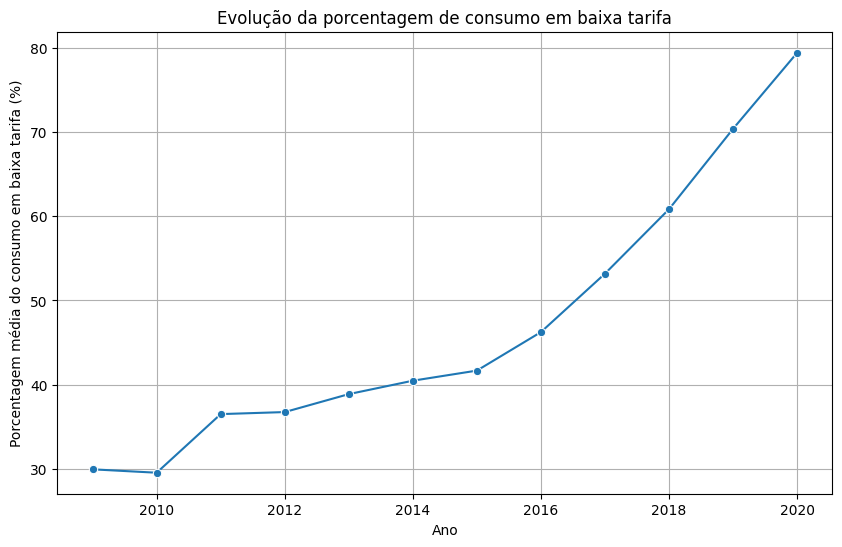

In [9]:
# Analisar a evolução do consumo em baixa tarifa (proxy para produção própria)
lowtarif_year = df_all.groupby('year')['annual_consume_lowtarif_perc'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=lowtarif_year.index, y=lowtarif_year.values, marker='o')
plt.title('Evolução da porcentagem de consumo em baixa tarifa')
plt.xlabel('Ano')
plt.ylabel('Porcentagem média do consumo em baixa tarifa (%)')
plt.grid(True)
plt.show()

## 4. Sinais de Carros Elétricos nos Bairros

Vamos buscar padrões de consumo que possam indicar a presença de carros elétricos nas regiões. Normalmente, bairros com alta penetração de carros elétricos apresentam aumento no consumo residencial, especialmente em horários fora do pico, e maior variação no consumo total.

,year,city,annual_consume,pct_change
2488,2011,FINKUM,8883.0,205.783133
6335,2014,SMALLE EE,9824.0,190.995261
11117,2019,BOER,17358.5,147.660151
13040,2020,VETHUIZEN,27040.0,141.148667
3949,2012,NIeuw Vennep,18082.0,137.514777
7097,2015,LANGEDIJK,21013.0,116.919583
8020,2016,HALFWEG,10043.0,110.368664
6543,2014,WORMERLAND,4596.0,96.830835
1512,2010,HOMOET,13117.0,92.049780
10729,2018,SMALLE EE,7427.0,88.502538


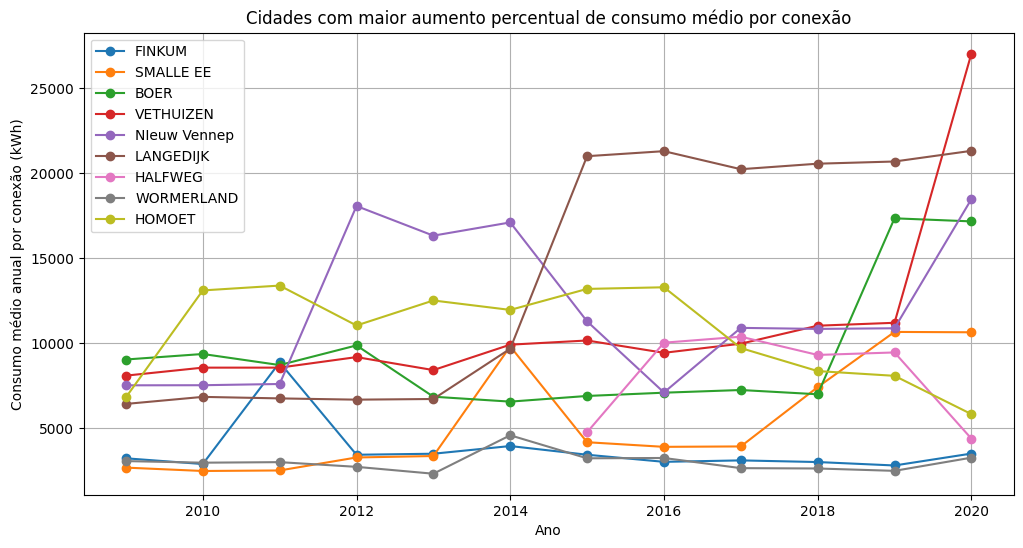

In [10]:
# Procurar bairros com aumento expressivo de consumo por conexão
bairro_consumo = df_all.groupby(['year', 'city'])['annual_consume'].mean().reset_index()

# Calcular a variação percentual ano a ano por cidade
bairro_consumo['pct_change'] = bairro_consumo.groupby('city')['annual_consume'].pct_change() * 100

# Selecionar cidades com maior aumento em algum ano
top_bairros = bairro_consumo.sort_values('pct_change', ascending=False).dropna().head(10)
display(top_bairros)

plt.figure(figsize=(12,6))
for city in top_bairros['city'].unique():
    dados = bairro_consumo[bairro_consumo['city'] == city]
    plt.plot(dados['year'], dados['annual_consume'], marker='o', label=city)
plt.title('Cidades com maior aumento percentual de consumo médio por conexão')
plt.xlabel('Ano')
plt.ylabel('Consumo médio anual por conexão (kWh)')
plt.legend()
plt.grid(True)
plt.show()

## 5. Previsão do Consumo de Energia para o Próximo Ano

Vamos utilizar modelos de aprendizado de máquina para prever o consumo médio anual de energia para o próximo ano, com base nos dados históricos agregados.

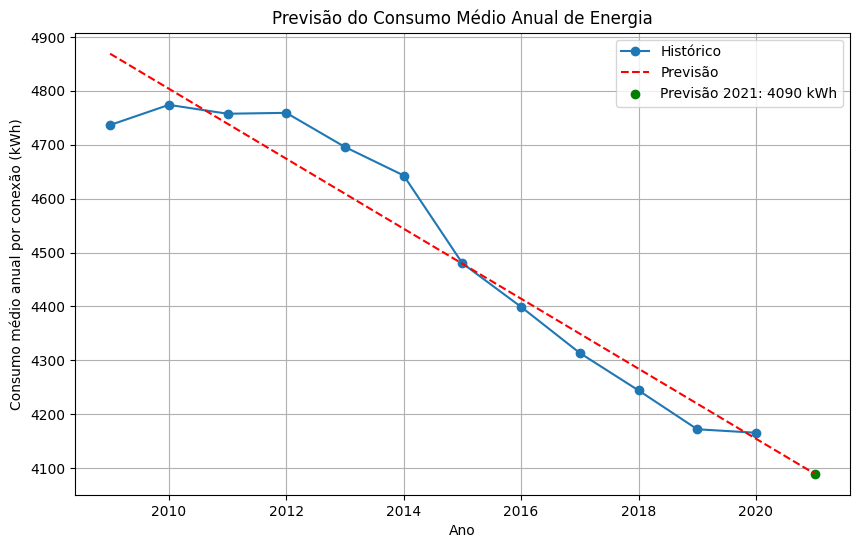

Previsão para o ano 2021: 4090 kWh por conexão


In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Agregar consumo médio anual por ano
consumo_ano = df_all.groupby('year')['annual_consume'].mean().reset_index()
X = consumo_ano['year'].values.reshape(-1, 1)
y = consumo_ano['annual_consume'].values

# Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Prever para o próximo ano
years = np.append(X.flatten(), X.max() + 1).reshape(-1, 1)
pred = model.predict(years)

plt.figure(figsize=(10,6))
plt.plot(consumo_ano['year'], consumo_ano['annual_consume'], marker='o', label='Histórico')
plt.plot(years.flatten(), pred, '--', color='red', label='Previsão')
plt.scatter(years[-1], pred[-1], color='green', label=f'Previsão {int(years[-1][0])}: {pred[-1]:.0f} kWh')
plt.title('Previsão do Consumo Médio Anual de Energia')
plt.xlabel('Ano')
plt.ylabel('Consumo médio anual por conexão (kWh)')
plt.legend()
plt.grid(True)
plt.show()

print(f'Previsão para o ano {int(years[-1][0])}: {pred[-1]:.0f} kWh por conexão')